# Project 5: Communicate Data Findings : 2020 US Domestic Flights Dataset 

The 2020 US Domestic Flights datset contains 607346 rows and 22 features.\

**Feature Description :**
* **YEAR**   
* **MONTH**  
* **DAY_OF_MONTH**   
* **DAY_OF_WEEK**: 1: Monday 2: Tuesday 3: Wednesday 4: Thursday 5: Friday 6: Saturday 7:Sunday 9: Unknown  
* **FL_DATE**: Flight Date (yymmdd)  
* **ORIGIN** : Origin Airport  
* **ORIGIN_CITY_NAME**: Origin Airport, City Name  
* **ORIGIN_STATE_NM**: Origin Airport, State Name  
* **DEST**: Destination Airport  
* **DEST_CITY_NAME**: Destination Airport, City Name  
* **DEST_STATE_NM**: Destination Airport, State Name  
* **DEP_TIME**: Actual Departure Time (local time: hhmm)  
* **DEP_DELAY**: Difference between scheduled and actual departure time. Early departures show negative numbers (minutes).  
* **DEP_DEL15**: Departure Delay Indicator, 15 Minutes or More (1=Yes; 0=NO)  
* **ARR_TIME**: Actual Arrival Time (local time: hhmm)  
* **ARR_DELAY**: Difference between scheduled and actual arrival time. Early arrivals show negative numbers (minutes).  
* **ARR_DEL15**: Arrival Delay Indicator, 15 Minutes or More (1=Yes; 0=No)  
* **CANCELLED**: Cancelled Flight Indicator (1=Yes; 0=NO)  
* **AIR_TIME**: Flight Time (minutes)  
* **DISTANCE**: Distance between airports (miles)  
* **Code** :  Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.  
* **Description** : Description of the Carrier  

    
## Preliminary Wrangling

The 2020 US Domestic Flights datset contains 
This document explores the datset containing time, location, and delay status of 607346 flights of 2020 January US flights. 

In [39]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [40]:
#Load flights dataset
flights = pd.read_csv('flights.csv')
flights.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,...,DEP_TIME,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,AIR_TIME,DISTANCE,Unnamed: 21
0,2020,1,1,3,2020-01-01,WN,ONT,"Ontario, CA",California,SFO,...,1851.0,41.0,1.0,2053.0,68.0,1.0,0.0,74.0,363.0,NaN
1,2020,1,1,3,2020-01-01,WN,ONT,"Ontario, CA",California,SFO,...,1146.0,-4.0,0.0,1318.0,-2.0,0.0,0.0,71.0,363.0,NaN
2,2020,1,1,3,2020-01-01,WN,ONT,"Ontario, CA",California,SJC,...,2016.0,-4.0,0.0,2124.0,-6.0,0.0,0.0,57.0,333.0,NaN
3,2020,1,1,3,2020-01-01,WN,ONT,"Ontario, CA",California,SJC,...,1350.0,10.0,0.0,1505.0,10.0,0.0,0.0,63.0,333.0,NaN
4,2020,1,1,3,2020-01-01,WN,ONT,"Ontario, CA",California,SJC,...,916.0,1.0,0.0,1023.0,-12.0,0.0,0.0,57.0,333.0,NaN


In [41]:
#Load carriers dataset
carriers = pd.read_csv('L_UNIQUE_CARRIERS.csv')
carrier_dict = dict(carriers.values)
carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [42]:
#Drop unnecessary columns and merge flights and carriers dataset
flights.drop(['Unnamed: 21'], axis = 1, inplace = True)
flights = pd.merge(flights, carriers, left_on = 'OP_UNIQUE_CARRIER', right_on = 'Code', how = "left")
flights.drop(['OP_UNIQUE_CARRIER'], axis = 1, inplace = True)

#print(flights.dtypes)
flights.head()
print(flights.dtypes)

YEAR                  int64
MONTH                 int64
DAY_OF_MONTH          int64
DAY_OF_WEEK           int64
FL_DATE              object
ORIGIN               object
ORIGIN_CITY_NAME     object
ORIGIN_STATE_NM      object
DEST                 object
DEST_CITY_NAME       object
DEST_STATE_NM        object
DEP_TIME            float64
DEP_DELAY           float64
DEP_DEL15           float64
ARR_TIME            float64
ARR_DELAY           float64
ARR_DEL15           float64
CANCELLED           float64
AIR_TIME            float64
DISTANCE            float64
Code                 object
Description          object
dtype: object


In [43]:
#Change the datatype of variables 
col = ['DAY_OF_MONTH', 'DEP_DEL15','ARR_DEL15','CANCELLED']
flights[col] = flights[col].astype('object')

col2 = ['DEP_TIME', 'ARR_TIME', 'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME']
flights[col2] = flights[col2].round(0).astype('Int64')
flights.dtypes

YEAR                  int64
MONTH                 int64
DAY_OF_MONTH         object
DAY_OF_WEEK           int64
FL_DATE              object
ORIGIN               object
ORIGIN_CITY_NAME     object
ORIGIN_STATE_NM      object
DEST                 object
DEST_CITY_NAME       object
DEST_STATE_NM        object
DEP_TIME              Int64
DEP_DELAY             Int64
DEP_DEL15            object
ARR_TIME              Int64
ARR_DELAY             Int64
ARR_DEL15            object
CANCELLED            object
AIR_TIME              Int64
DISTANCE            float64
Code                 object
Description          object
dtype: object

In [44]:
#Create DEP_HOUR and ARR_HOUR by extracting hour from DEP_TIME and ARR_TIME
flights.DEP_TIME[flights.DEP_TIME<100] = np.nan
flights['DEP_HOUR'] = ''
flights['DEP_HOUR'] = flights.DEP_TIME//100
flights['DEP_HOUR'] = flights.DEP_HOUR.mask(flights.DEP_HOUR==24, 0)
flights.DEP_HOUR.replace('n', np.NaN, inplace = True)

flights.ARR_TIME[flights.ARR_TIME<100] = np.nan
flights['ARR_HOUR'] = ''
flights['ARR_HOUR'] = flights.ARR_TIME//100
flights['ARR_HOUR'] = flights.ARR_HOUR.mask(flights.DEP_HOUR==24, 0)
flights.ARR_HOUR.replace('n', np.NaN, inplace = True)

In [45]:
#Create DEP_TIME_AM column
flights['DEP_TIME_AM'] = 'AM'
flights['DEP_TIME_AM'] = flights.DEP_TIME_AM.mask(flights.DEP_HOUR>11, 'PM')
flights['DEP_TIME_AM'] = flights['DEP_TIME_AM'].astype('category')
flights['DEP_TIME_AM'].cat.reorder_categories(['AM', 'PM'],inplace=True)

#Create ARR_TIME_AM column
flights['ARR_TIME_AM'] = 'AM'
flights['ARR_TIME_AM'] = flights.DEP_TIME_AM.mask(flights.DEP_HOUR>11, 'PM')
flights['ARR_TIME_AM'] = flights['ARR_TIME_AM'].astype('category')
flights['ARR_TIME_AM'].cat.reorder_categories(['AM', 'PM'],inplace=True)

#Create WEEKDAY_WEEKEND column
flights['WEEKDAY_WEEKEND'] = 'Weekday'
flights['WEEKDAY_WEEKEND'] = flights.WEEKDAY_WEEKEND.mask(flights.DAY_OF_WEEK>5, 'Weekend')
flights['WEEKDAY_WEEKEND'] = flights.WEEKDAY_WEEKEND.mask(flights.DAY_OF_WEEK==9).astype('category')
flights['WEEKDAY_WEEKEND']=flights['WEEKDAY_WEEKEND'].astype('category')
flights['WEEKDAY_WEEKEND'].cat.reorder_categories(['Weekday','Weekend'],inplace=True)

#Change DAY_OF_WEEK
flights['DAY_OF_WEEK'] = flights['DAY_OF_WEEK'].astype(str)
dayofweek = {'1':'Monday','2':'Tuesday','3':'Wednesday','4':'Thursday','5':'Friday','6':'Saturday','7':'Sunday'}
flights['DAY_OF_WEEK'].replace(dayofweek, inplace = True)
flights['DAY_OF_WEEK'] = flights['DAY_OF_WEEK'].astype('category')
flights['DAY_OF_WEEK'].cat.reorder_categories(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace=True)

#Change 1=Yes, 0=No
flights[['DEP_DEL15_','ARR_DEL15_','CANCELLED_']] = flights[['DEP_DEL15','ARR_DEL15','CANCELLED']].astype(pd.StringDtype())
flights['DEP_DEL15_'] = flights['DEP_DEL15_'].map({'1.0':'yes', '0.0':'no'})
flights['ARR_DEL15_'] = flights['ARR_DEL15_'].map({'1.0':'yes', '0.0':'no'})
flights['CANCELLED_'] = flights['CANCELLED_'].map({'1.0':'yes', '0.0':'no'})

flights=flights.mask(flights == '')
flights.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,...,Code,Description,DEP_HOUR,ARR_HOUR,DEP_TIME_AM,ARR_TIME_AM,WEEKDAY_WEEKEND,DEP_DEL15_,ARR_DEL15_,CANCELLED_
0,2020,1,1,Wednesday,2020-01-01,ONT,"Ontario, CA",California,SFO,"San Francisco, CA",...,WN,Southwest Airlines Co.,18,20,PM,PM,Weekday,yes,yes,no
1,2020,1,1,Wednesday,2020-01-01,ONT,"Ontario, CA",California,SFO,"San Francisco, CA",...,WN,Southwest Airlines Co.,11,13,AM,AM,Weekday,no,no,no
2,2020,1,1,Wednesday,2020-01-01,ONT,"Ontario, CA",California,SJC,"San Jose, CA",...,WN,Southwest Airlines Co.,20,21,PM,PM,Weekday,no,no,no
3,2020,1,1,Wednesday,2020-01-01,ONT,"Ontario, CA",California,SJC,"San Jose, CA",...,WN,Southwest Airlines Co.,13,15,PM,PM,Weekday,no,no,no
4,2020,1,1,Wednesday,2020-01-01,ONT,"Ontario, CA",California,SJC,"San Jose, CA",...,WN,Southwest Airlines Co.,9,10,AM,AM,Weekday,no,no,no


In [46]:
#Check data shape and data types
print(flights.dtypes)
print(flights.isna().sum())

YEAR                   int64
MONTH                  int64
DAY_OF_MONTH          object
DAY_OF_WEEK         category
FL_DATE               object
ORIGIN                object
ORIGIN_CITY_NAME      object
ORIGIN_STATE_NM       object
DEST                  object
DEST_CITY_NAME        object
DEST_STATE_NM         object
DEP_TIME               Int64
DEP_DELAY              Int64
DEP_DEL15             object
ARR_TIME               Int64
ARR_DELAY              Int64
ARR_DEL15             object
CANCELLED             object
AIR_TIME               Int64
DISTANCE             float64
Code                  object
Description           object
DEP_HOUR               Int64
ARR_HOUR               Int64
DEP_TIME_AM         category
ARR_TIME_AM         category
WEEKDAY_WEEKEND     category
DEP_DEL15_            object
ARR_DEL15_            object
CANCELLED_            object
dtype: object
YEAR                    0
MONTH                   0
DAY_OF_MONTH            0
DAY_OF_WEEK             0
FL_DATE     

In [47]:
#Check descriptive statistics
print(flights.describe())

           YEAR     MONTH     DEP_TIME  DEP_DELAY     ARR_TIME  ARR_DELAY  \
count  607346.0  607346.0     598999.0   600647.0     589889.0   599268.0   
mean     2020.0       1.0  1335.173095   6.181221  1503.560083  -1.620799   
std         0.0       0.0   492.965136  43.181905   493.139362  45.015546   
min      2020.0       1.0        100.0      -58.0        100.0      -96.0   
25%      2020.0       1.0        921.0       -6.0       1111.0      -18.0   
50%      2020.0       1.0       1328.0       -3.0       1521.0      -10.0   
75%      2020.0       1.0       1740.0        2.0       1922.0        2.0   
max      2020.0       1.0       2400.0     2489.0       2400.0     2536.0   

         AIR_TIME       DISTANCE   DEP_HOUR   ARR_HOUR  
count    599268.0  607346.000000   607346.0   589889.0  
mean   112.187437     798.022341  12.863995  14.739032  
std     70.629553     587.282639   5.137119   4.933739  
min           8.0      31.000000        0.0        1.0  
25%          61.0    

## DATA EXPLORATION

### Univariate Exploration

### Departure Delayed Flights

#### **DEP_DEL15** : Departure Delay Indicator, 15 Minutes or More

In [48]:
#Create function to plot pie charts of categorical features
def plot_pie(col):
    data = flights.groupby(flights[col]).size()

    plt.figure(figsize = (6,6))
    labels=['No', 'Yes']
    explode=(0,.1)
    colors = ['#ff9999','#66b3ff']
    textprops={'fontsize': 12}
    data.plot(kind='pie', autopct='%.2f%%', explode=explode, labels=labels, ylabel='', colors=colors, textprops=textprops, legend=True)
    

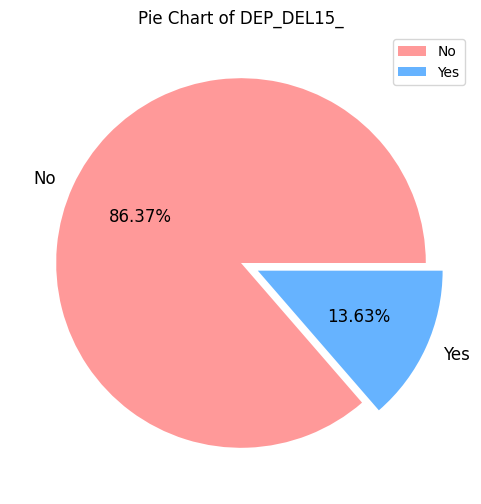

In [49]:
plot_pie('DEP_DEL15_')
plt.title('% of Departure Delayed Flights');

#### **DEP_DELAY** : Difference between scheduled and actual departure time

In [50]:
#Create function to plot histogram and boxplot of continuous features
def plot_distribution(col, step=5):
    
    #Filter NA values
    filtered_data = flights[~np.isnan(flights[col])]
    
    bin_edges = np.arange(filtered_data[col].min()- step, filtered_data[col].max()+step, step)
    x_min, x_max = filtered_data[col].quantile(0.01)- step, filtered_data[col].quantile(0.99)+step

    #Plot histogram
    plt.figure(figsize = [15,6])
    plt.subplot(2,1,1)
    plt.hist(filtered_data[col], bins=bin_edges)
    #Add delay indicator for DEP_DELAY and ARR_DELAY
    if col=="DEP_DELAY" or "ARR_DELAY":
        plt.axvline(15, color='k', linestyle='--')
    plt.xlim(x_min, x_max)
    plt.xticks(np.arange(x_min,x_max,step), fontsize=6)

    #Plot Boxplot
    plt.subplot(2,1,2)
    plt.boxplot(x=filtered_data[col], vert=False, showfliers=False)
    #Add delay indicator for DEP_DELAY and ARR_DELAY
    if col=="DEP_DELAY" or "ARR_DELAY":
        plt.axvline(15, color='k', linestyle='--')
    plt.xlim(x_min,x_max)
    plt.xticks(np.arange(x_min,x_max,step), fontsize=6)

    if col=="DISTANCE":
        plt.xlabel(col+"(miles)")  
    else:
        plt.xlabel(col+"(min)")


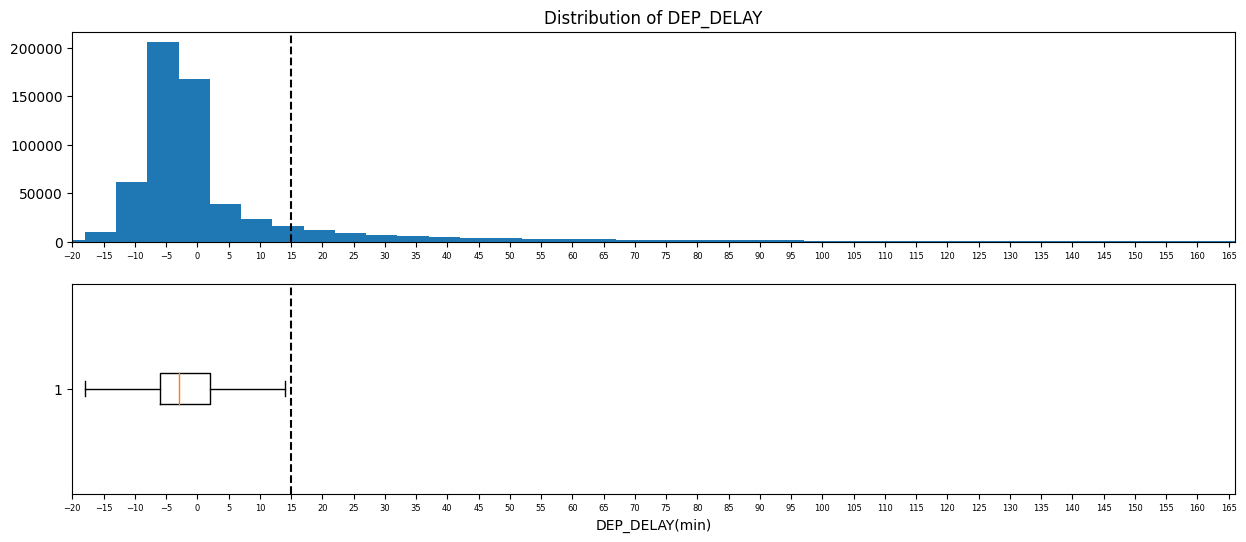

In [51]:
plot_distribution('DEP_DELAY')
plt.suptitle('Distribution of Flight Departure Delay');

> 13.6% of all 2020 January flights were departure delayed for more than 15 minutes. Most planes departed in betweeen 20 minutes prior to and 20 minutes after actual departure time. The overall distribution is skewed to the right; there are planes that departed more than 60 minutes after the actual departure time. The maximum delayed departure is 2489 minutes (41.5 hours). 

### Arrival Delayed Flights

#### **ARR_DEL15** : Arrival Delay Indicator, 15 Minutes or More

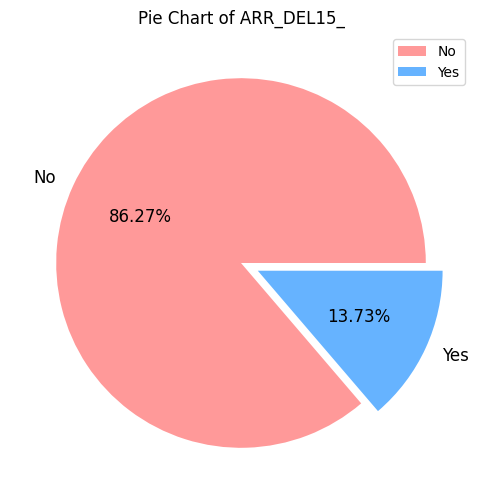

In [52]:
plot_pie('ARR_DEL15_')

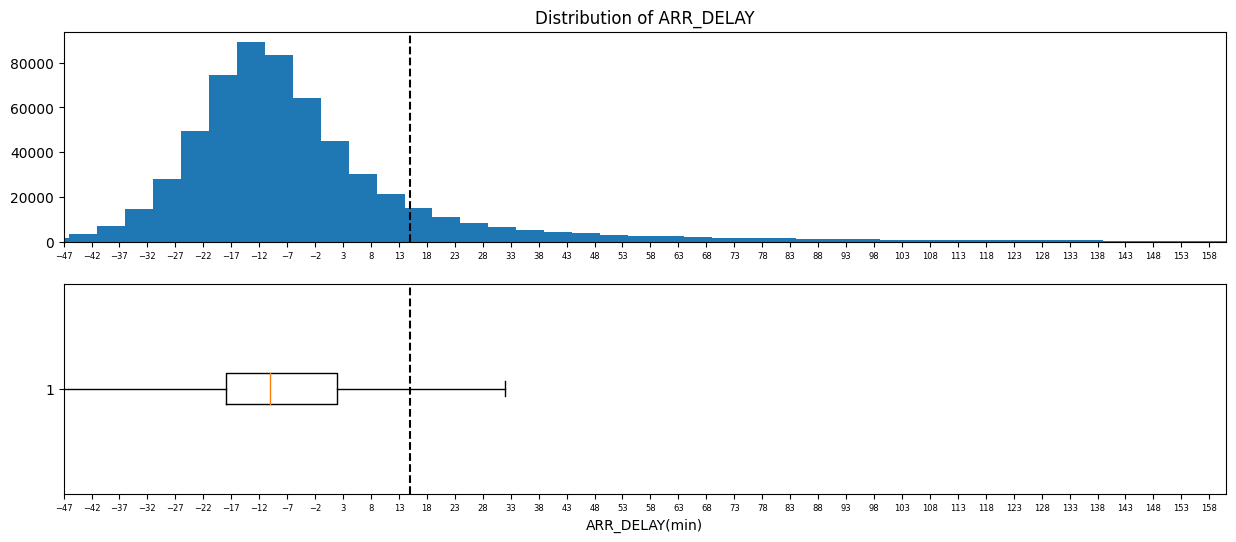

In [53]:
plot_distribution('ARR_DELAY')

> 13.7% of all 2020 January flights were arrival delayed for more than 15 minutes. Most planes arrived in betweeen 40 minutes prior to and 40 minutes after of actual departure time. The overall distribution is approximately normal; there are planes that arrive as early as 60 minutes prior to and 60 minutes after the actual arrival time. The maximum delayed arrival is 2536 minutes (42.3 hours). 


### Cancelled Flights

#### **CANCELLED** : Cancelled Flight Indicator (1=Yes; 0=NO)

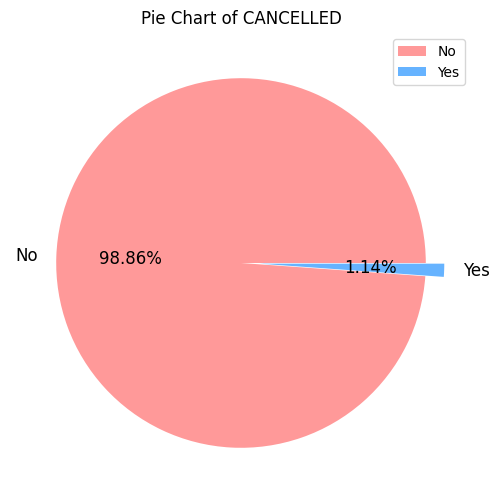

In [54]:
plot_pie('CANCELLED')

> 1.14% of all 2020 January flights were cancelled.

### Flight Air Time

#### **AIR_TIME** : Flight Time 

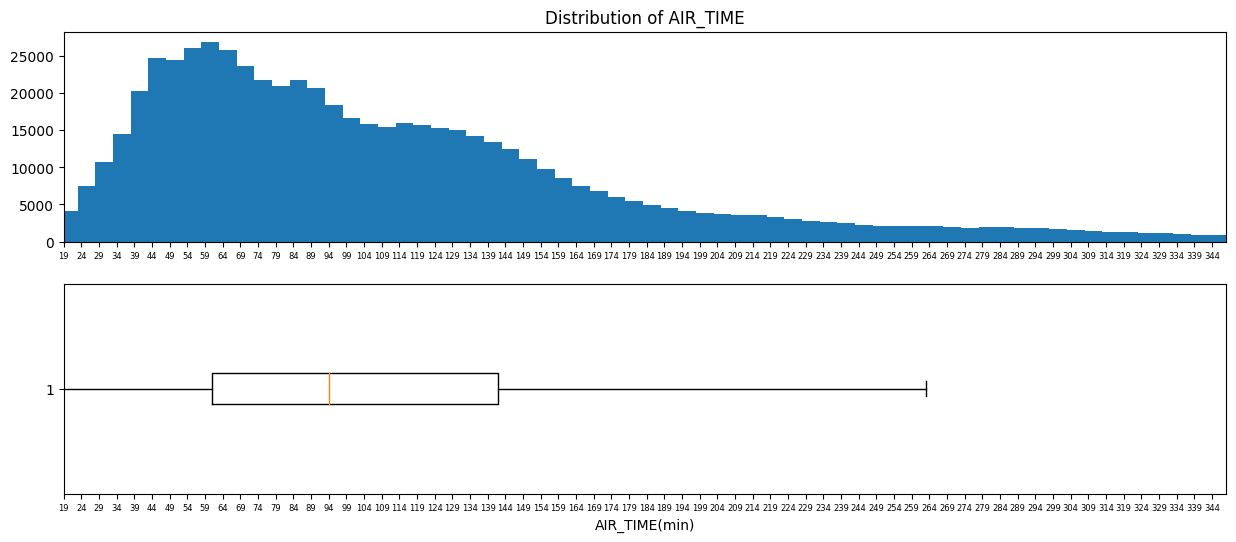

In [55]:
plot_distribution('AIR_TIME')

> Most flights have an air time between 30 minutes and 200 minutes. The distribution has a long right tail (outliers to the right). The maximum air time is 698 minutes. 

### Flight Distance
#### DISTANCE

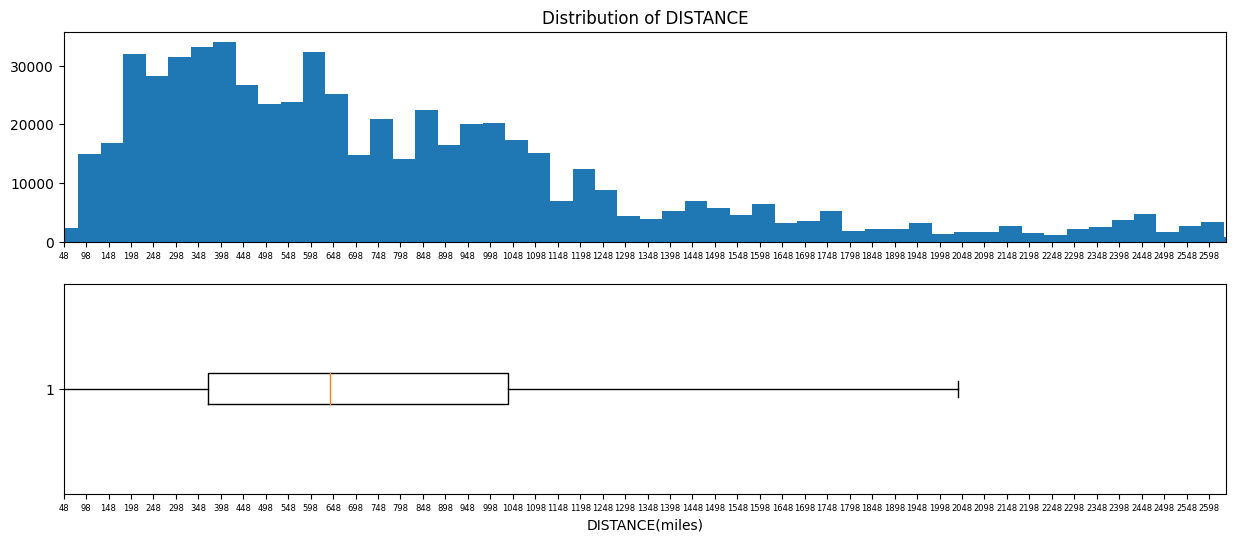

In [56]:
plot_distribution('DISTANCE',step=50)

> Most flights have distance between 300 miles and 1800 miles. Like the distribtuions above, the distribution has a long right tail (outliers to the right). The maximum air time is 5095 miles.


### Flight Departure Time

#### **DEP_HOUR** : Actual Departure Time
#### **DEP_TIME_AM** : Departure Time Indicator, AM or PM

In [57]:
#Create 2 bar plots of categorical variable
def plot_barplot(col1, col2):
    #Filter NA values
    filtered_data = flights[~pd.isna(flights[col1])]
    
    plt.figure(figsize=(14,8))
    colors = sns.color_palette()[0]

    #First barplot
    plt.subplot(2,1,1)
    sns.countplot(x=filtered_data[col1], color=colors)
    plt.title('Flights by '+col1)
    
    #Second barplot
    plt.subplot(2,1,2);
    sns.countplot(x=filtered_data[col2], color=colors);

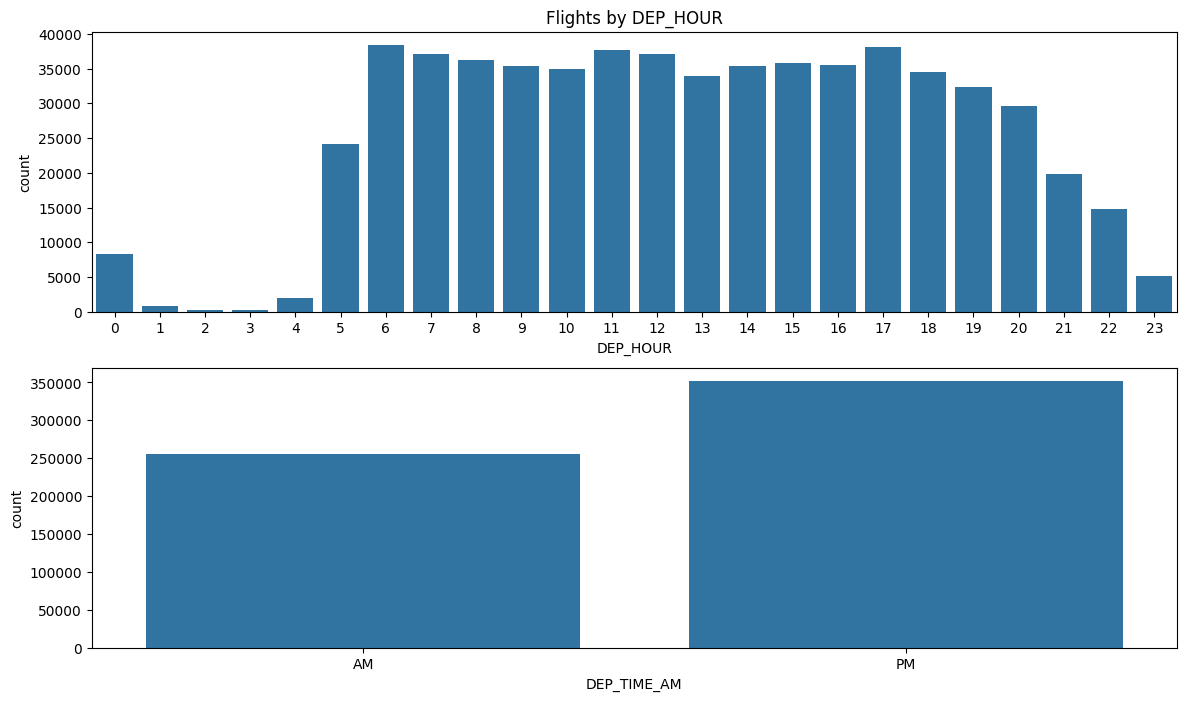

In [58]:
plot_barplot('DEP_HOUR', 'DEP_TIME_AM')

> Most flights departed between 5AM and 11PM; the peak departure time is between at 6AM to 6PM. There are more flights that depart during the afternoon.   

### Flight Arrival Time

#### **ARR_HOUR** : Actual Arrival Time
#### **ARR_TIME_AM** : Arrival Time Indicator, AM or PM

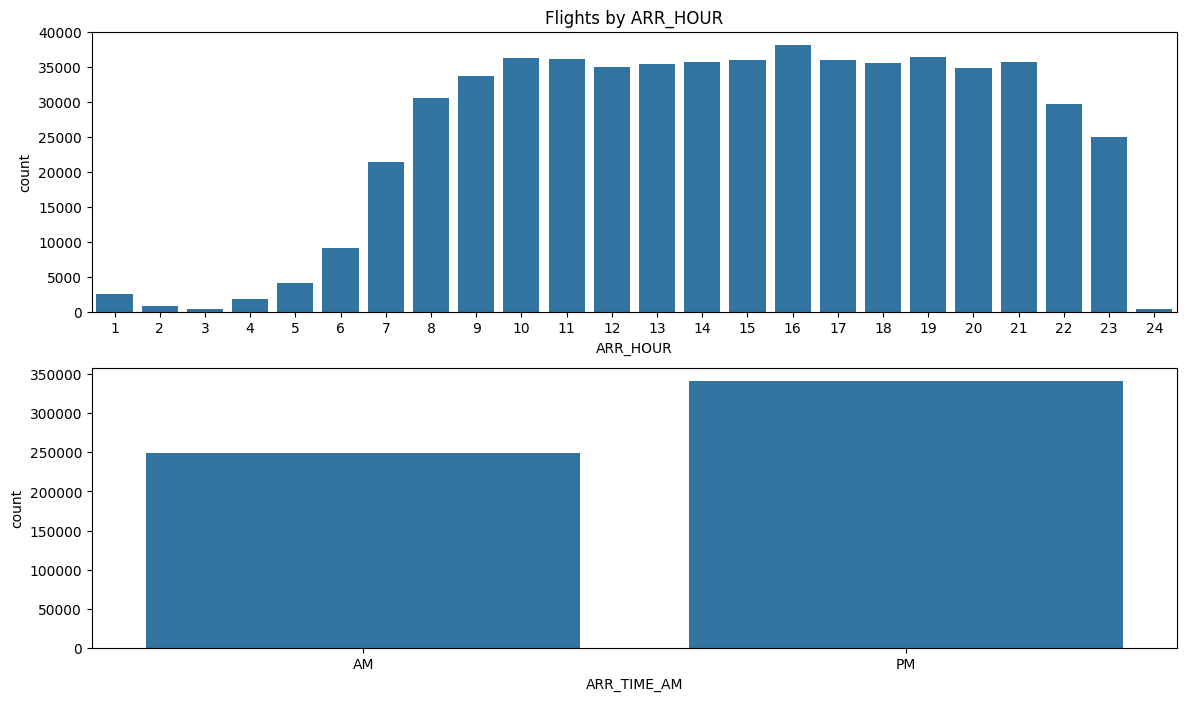

In [59]:
plot_barplot('ARR_HOUR', 'ARR_TIME_AM')

> Most flights arrived between 8AM and 11PM; the peak arrival time is between at 9AM to 11PM. There are more flights that arrive during the afternoon.

### Flight departure date

#### **DAY_OF_WEEK**: 
#### **WEEKDAY_WEEKEND** : Weeday or Weekend Indicator

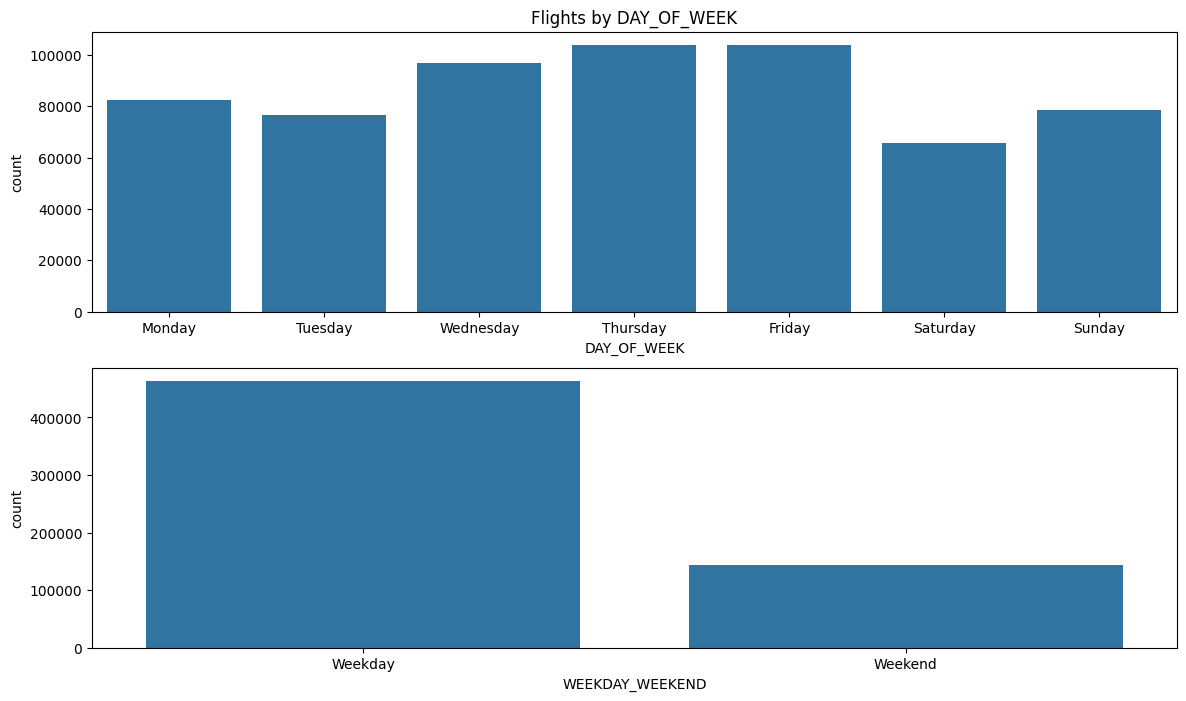

In [60]:
plot_barplot('DAY_OF_WEEK', 'WEEKDAY_WEEKEND')

> The days with the most number of flights are Thursday and Friday. There are more flights in the Weekday than the Weekend (Saturday has the least number of flights). 

### Flight Origin Airport, City, State

#### ORIGIN

In [61]:
def nlargest(col, n=20):
    plt.figure(figsize=[10,8])
    flights[col].value_counts().nlargest(n).sort_values().plot(kind='barh')
    plt.title('Flight Count by '+col+' (top '+str(n)+')')

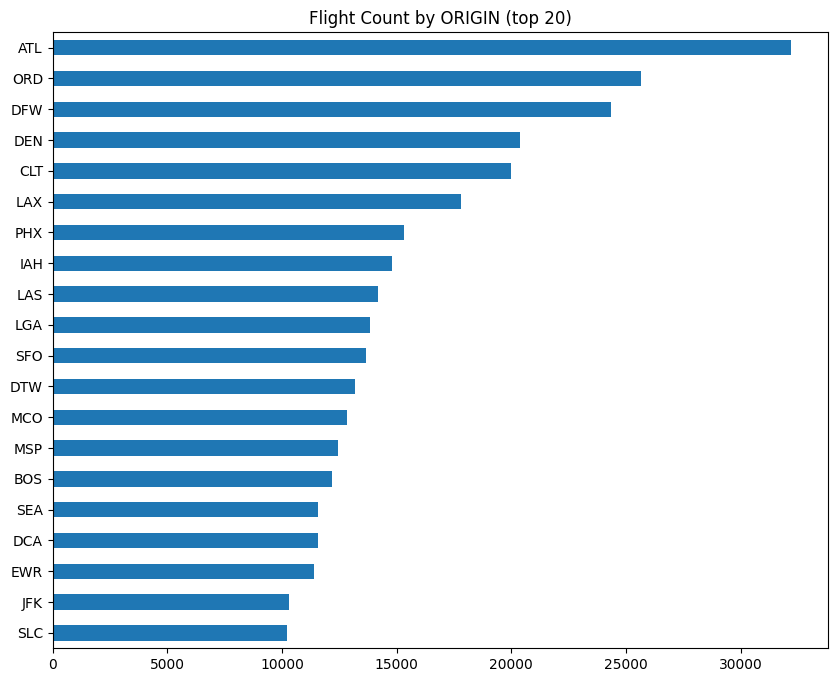

In [62]:
nlargest('ORIGIN')

> The origin airports with the most number of flights are ATL, ORD, DFW, DEN, CLT, LAX, PHX (in that order). 

### ORIGIN_CITY_NAME

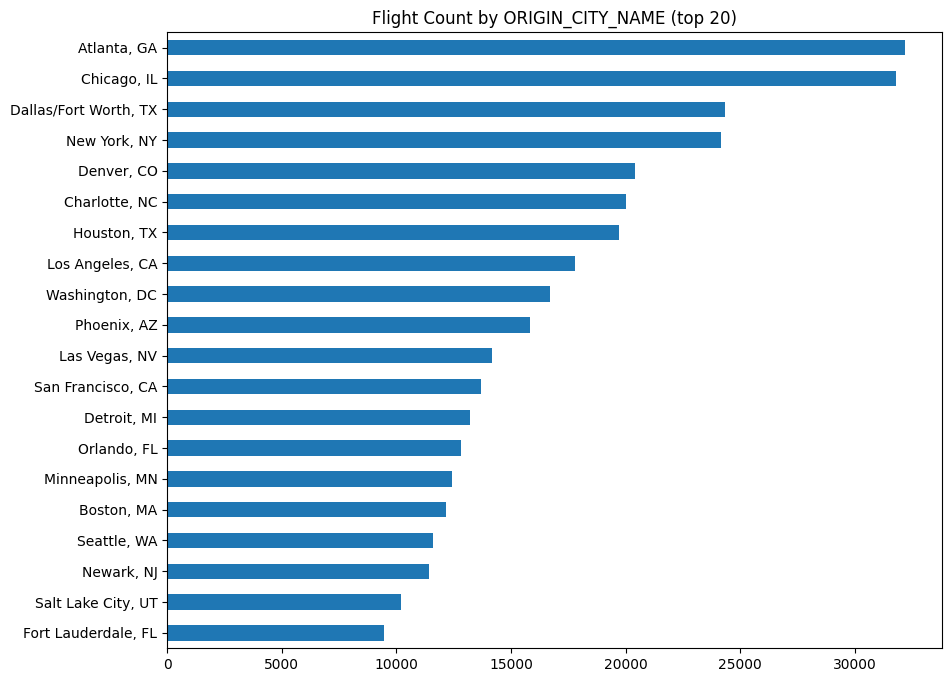

In [63]:
nlargest('ORIGIN_CITY_NAME')

> The origin cities with the most number of flights air Atlanta, Chicago, Dallas/Fort Worth, New York, Denver(in that order). These are the cities of the origin airport. 

### ORIGIN_STATE_NAME 

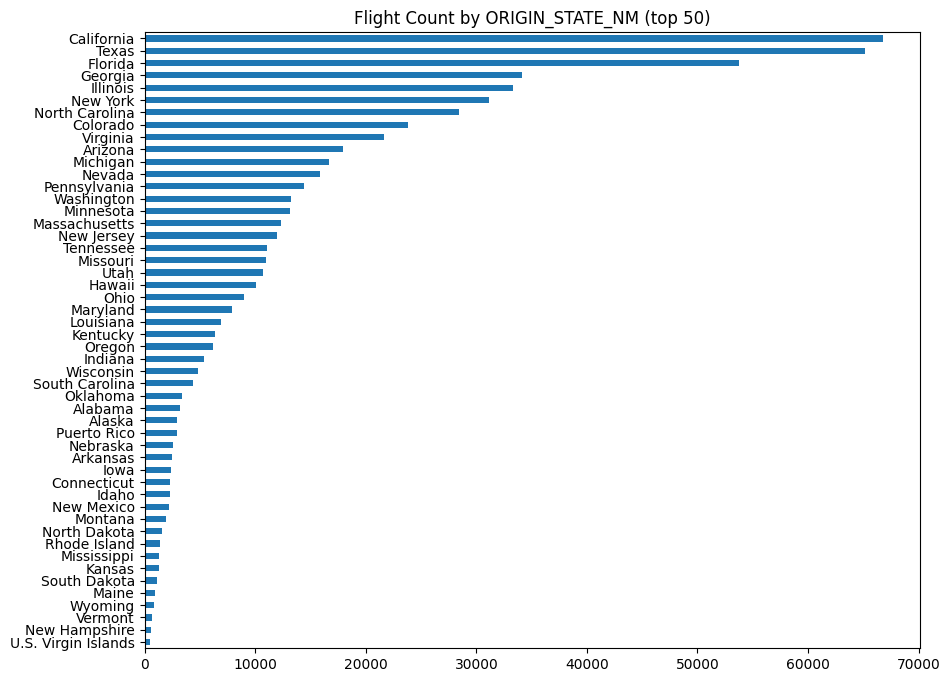

In [64]:
nlargest('ORIGIN_STATE_NM',50)

> The origin states with the most number of flights are Calinfornia, Texas, Florida, Georgia. Illinois (in that order). This order is not necessarily the states with the top origin airports because there are multiple airports in a state. 

### Flight Carrier

#### Description

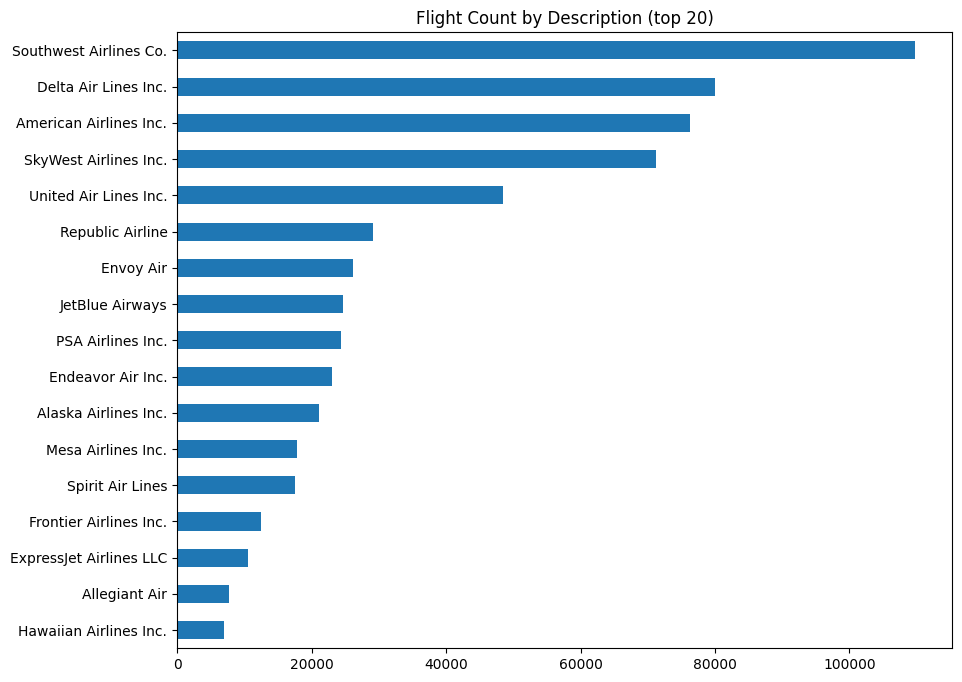

In [65]:
nlargest('Description')

> The carriers with the most number of flights are Soutwest Airlines, Delta Air Lines, American Airlines, SkyWest Airlines, United Airlines, Republic Airline (in that order);

#### **RESULTS**
* **Departure** :
    * 13.6% of all flights are **departure delayed**. 
    * Most flights depart **between 5AM and 11PM**.
    * There are maximum number of flights on **Thursdays and Fridays**.
* **Arrival**
    * 13.7% of all flights are **arrival delayed**.
    * Most flights arrive **between 8AM and 11PM**
* **Cancelled**
    * 1.14% of all flights are **cancelled**.
* **Origin**
    * The origin airports with the most number of flights are **ATL, ORD, DFW**.
    * The origin cities with the most number of flights are **Atlanta, Chicago, Dallas/Fort Worth**.
    * The origin states with the most number of flights are **Calinfornia, Texas, Florida**.
    * The carriers with the most number of flights are **Southwest Airlines, Delta Air Lines, American Airlines**.

## Bivariate Exploration

### Features by Departure Delay

Text(0.5, 0.98, 'Barplot of Categorical Variables by Departure Delay')

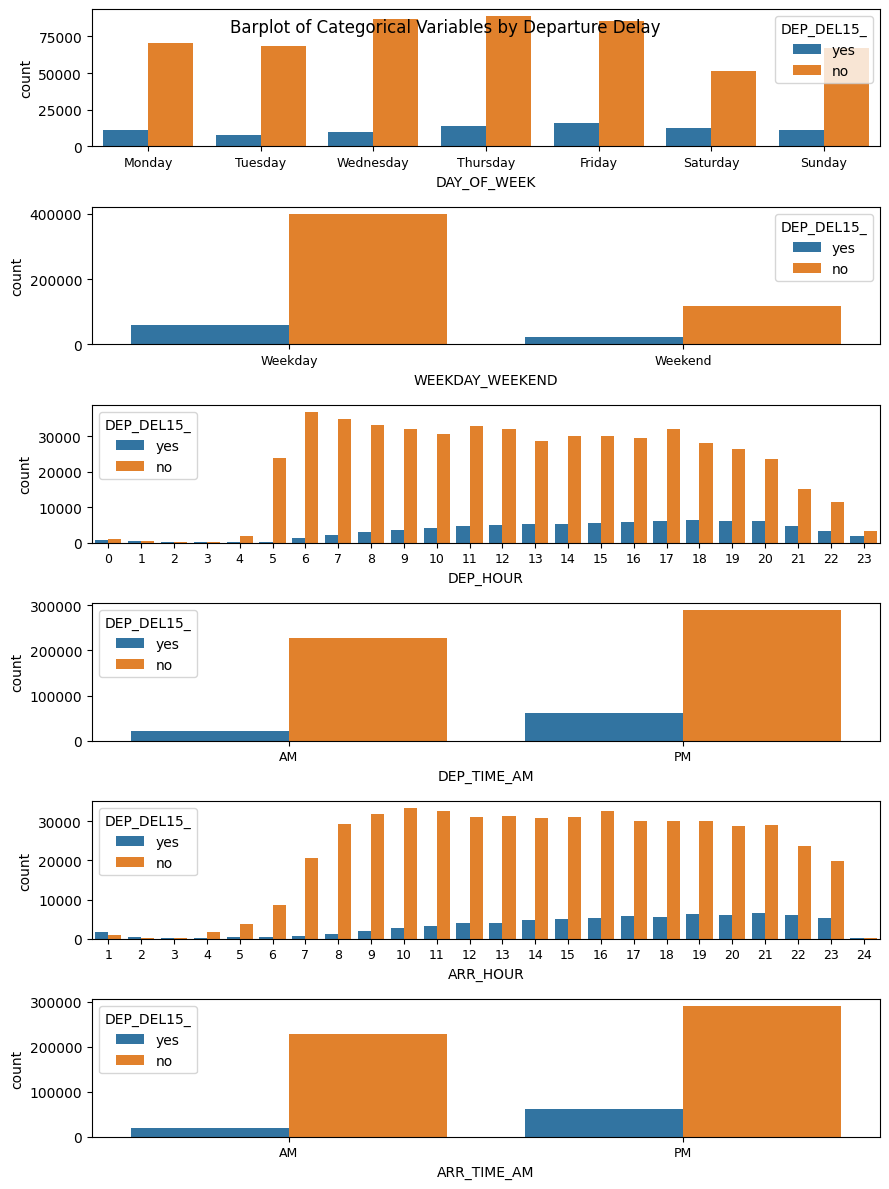

In [66]:
col  = ['DAY_OF_WEEK','WEEKDAY_WEEKEND','DEP_HOUR','DEP_TIME_AM','ARR_HOUR','ARR_TIME_AM']

f, axs = plt.subplots(len(col), 1, figsize=(9,12))

for ax, col in zip(axs, col):
    filtered_data = flights[~pd.isna(flights[col])]
    sns.countplot(x=filtered_data[col], hue=filtered_data['DEP_DEL15_'], ax=ax)
    ax.tick_params(axis='x', labelsize=9)
f.tight_layout()
plt.suptitle('Barplot of Categorical Variables by Departure Delay') 

Text(0.5, 0.98, 'Barplot of 10 Most Frequent Variables by Departure Delay')

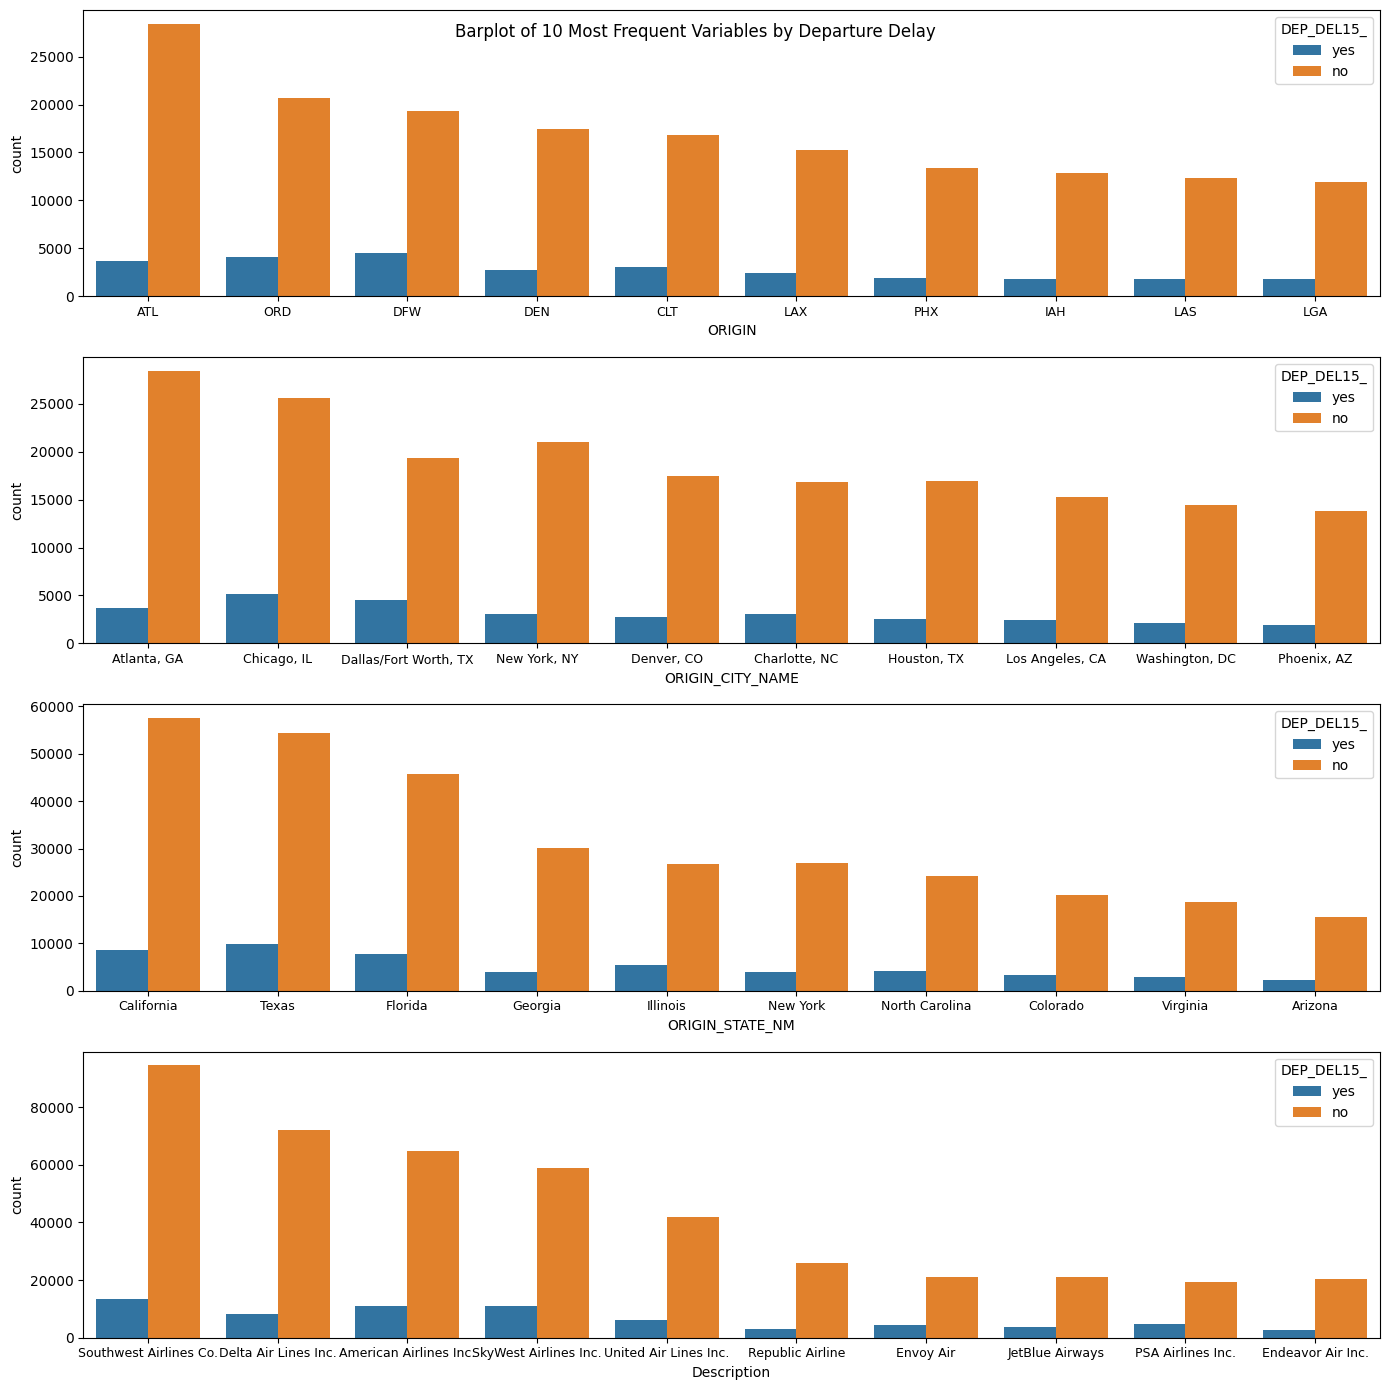

In [67]:
col = ['ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_NM','Description']

f, axs = plt.subplots(len(col),1,figsize=(14,14))
   
for ax,col in zip(axs,col):
    topten = flights[col].value_counts().nlargest(10)
    sns.countplot(x=flights[col], hue=flights['DEP_DEL15_'], order = topten.index, ax=ax)
    ax.tick_params(axis='x', labelsize=9)
f.tight_layout()
plt.suptitle('Barplot of 10 Most Frequent Variables by Departure Delay') 

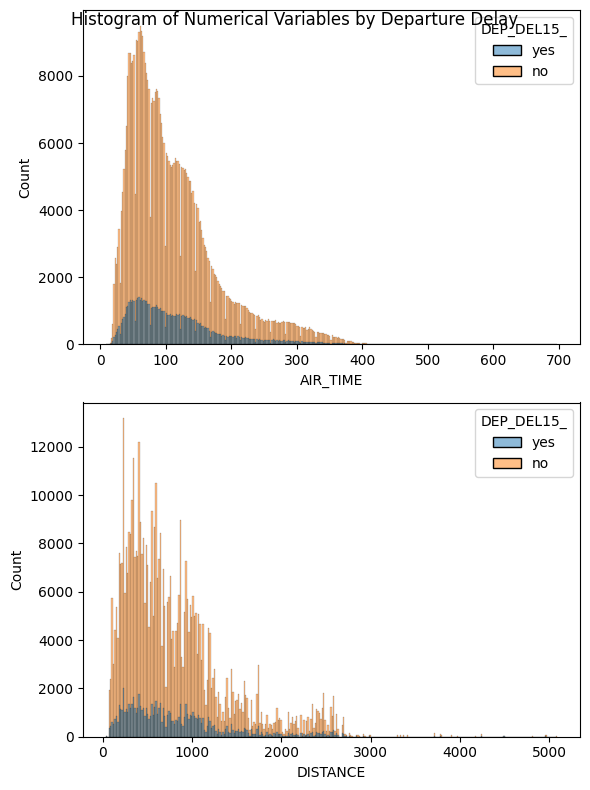

In [68]:
col = ['AIR_TIME','DISTANCE']

f, axs = plt.subplots(len(col), 1, figsize=(6,8))

for ax, col in zip(axs, col):
    filtered_data = flights[~pd.isna(flights[col])]
    sns.histplot(x=filtered_data[col], hue=filtered_data['DEP_DEL15_'], ax=ax)
f.tight_layout()
plt.suptitle('Histogram of Numerical Variables by Departure Delay') 
plt.show()

### Most Delayed Flights 

#### Departure Time, Weekend/ Weekday, Day of Week

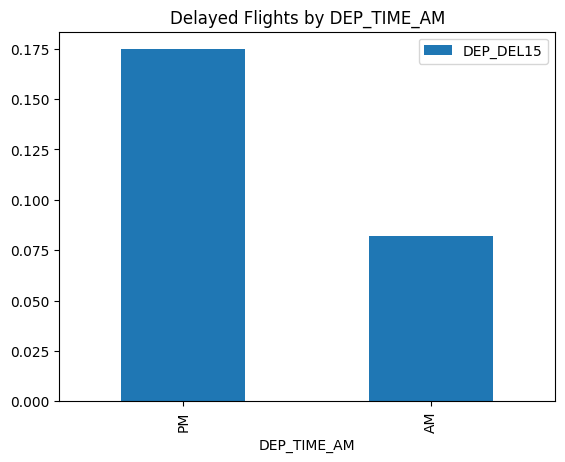

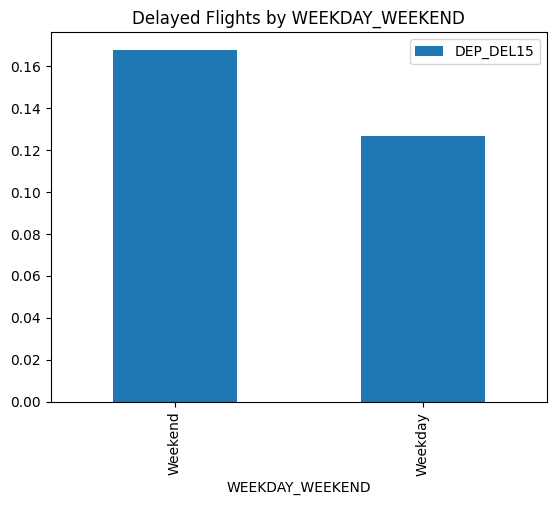

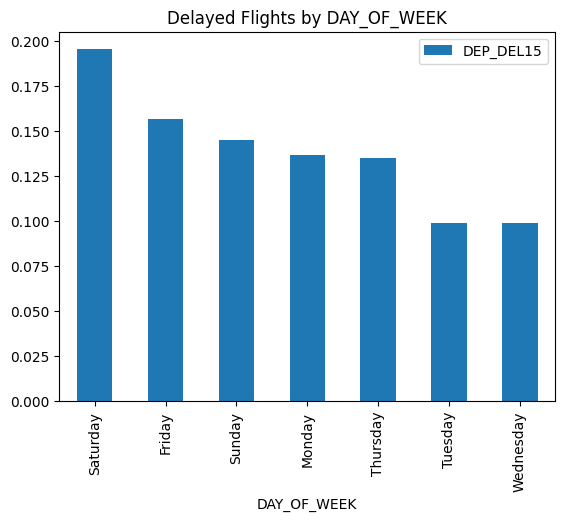

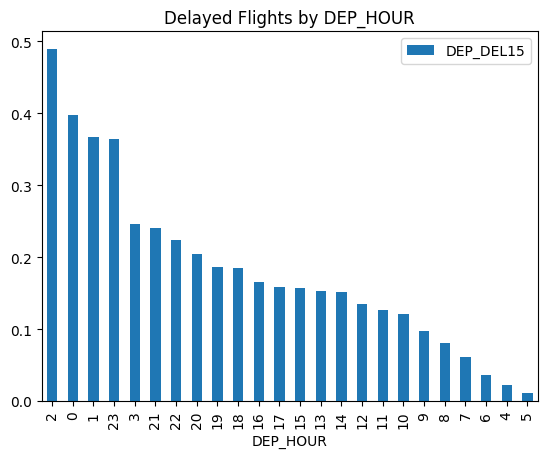

In [69]:
for feature in ['DEP_TIME_AM','WEEKDAY_WEEKEND','DAY_OF_WEEK','DEP_HOUR']:
     flights.groupby(feature).agg({'DEP_DEL15':'mean'} )\
            .sort_values('DEP_DEL15', ascending=False).plot.bar()
     plt.title('Delayed Flights by '+feature)
     plt.show()

#### Origin, Origin City, Origin State, Carrier

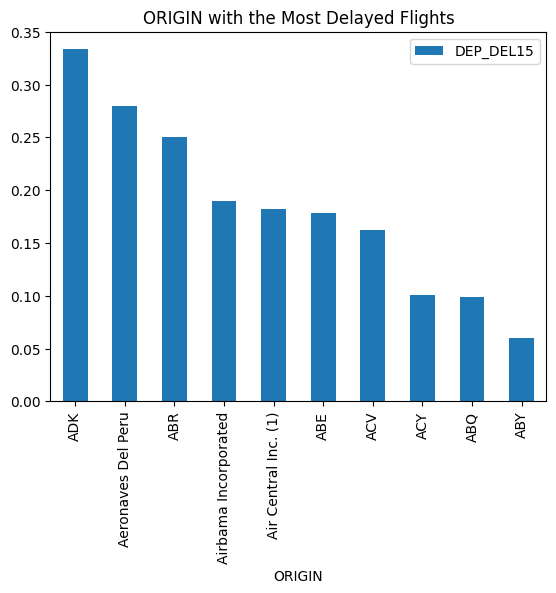

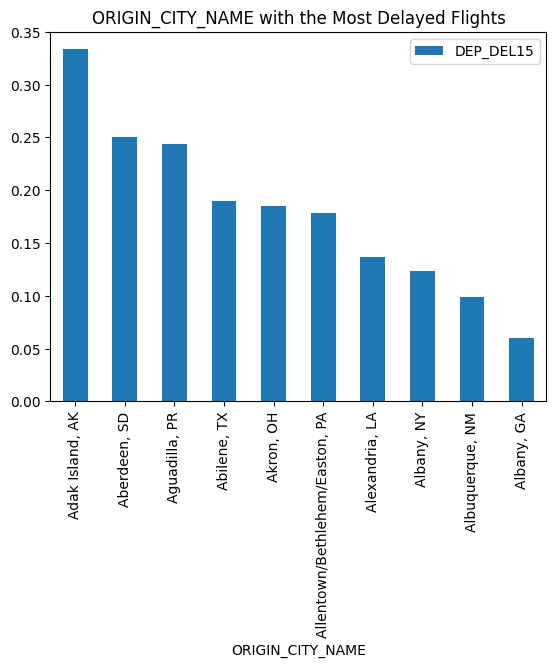

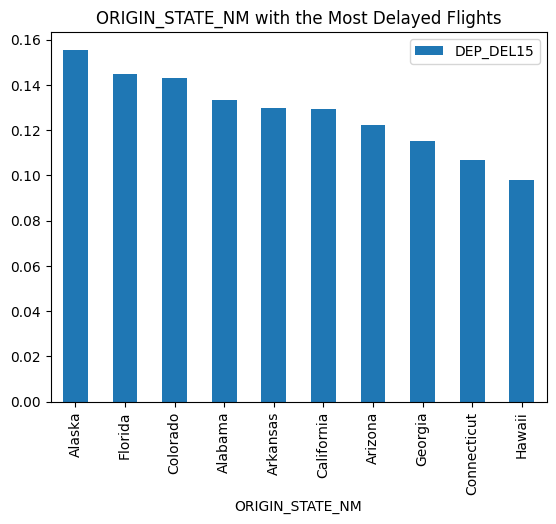

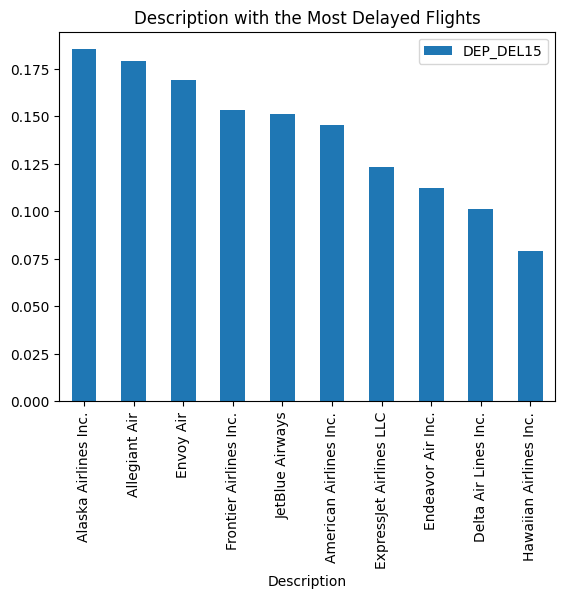

In [70]:
for feature in ['ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_NM','Description']:
    flights.groupby(feature).agg({'DEP_DEL15':'mean'}).head(10) \
            .rename(index=carrier_dict) \
            .sort_values('DEP_DEL15', ascending=False).plot.bar()
    plt.title(feature+' with the Most Delayed Flights')
    plt.show()

### Most Cancelled Flights 

#### Departure Time, Weekend/ Weekday, Day of Week

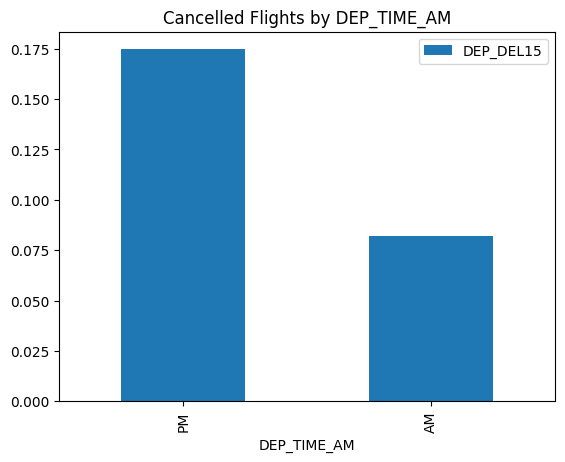

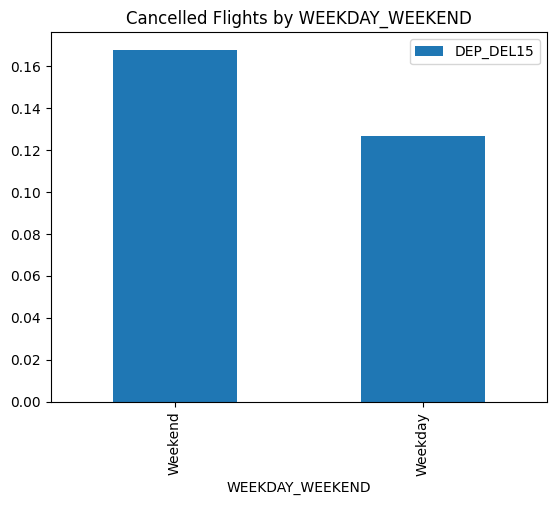

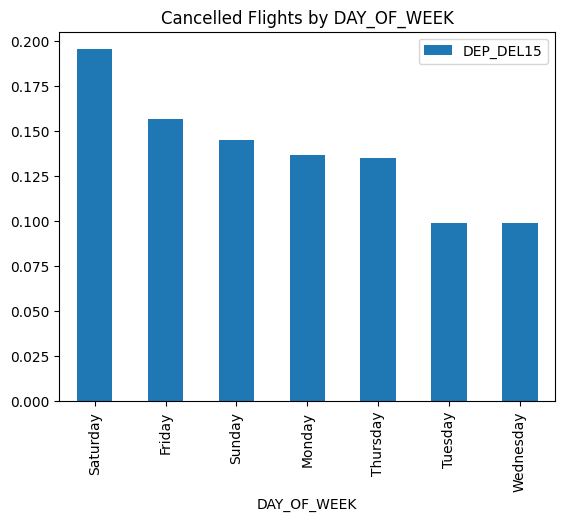

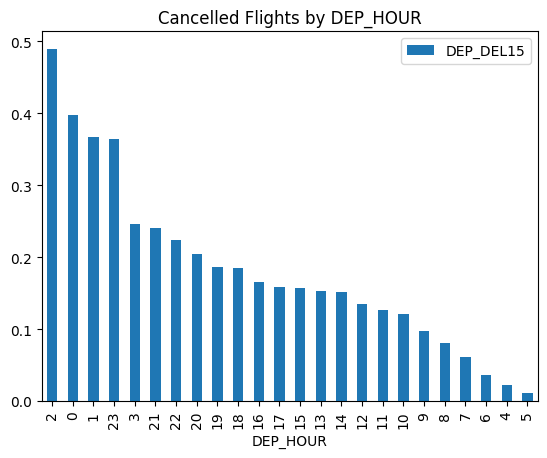

In [71]:
for feature in ['DEP_TIME_AM','WEEKDAY_WEEKEND','DAY_OF_WEEK','DEP_HOUR']:
     flights.groupby(feature).agg({'DEP_DEL15':'mean'} )\
            .sort_values('DEP_DEL15', ascending=False).plot.bar()
     plt.title('Cancelled Flights by '+feature)
     plt.show()

#### Origin, Origin City, Origin State, Carrier

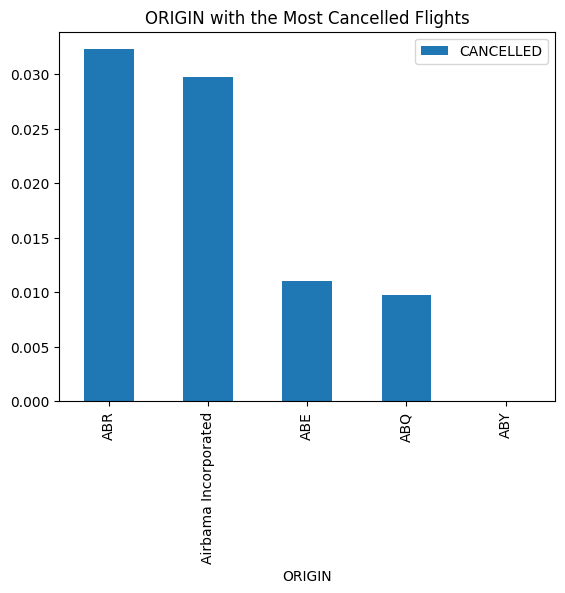

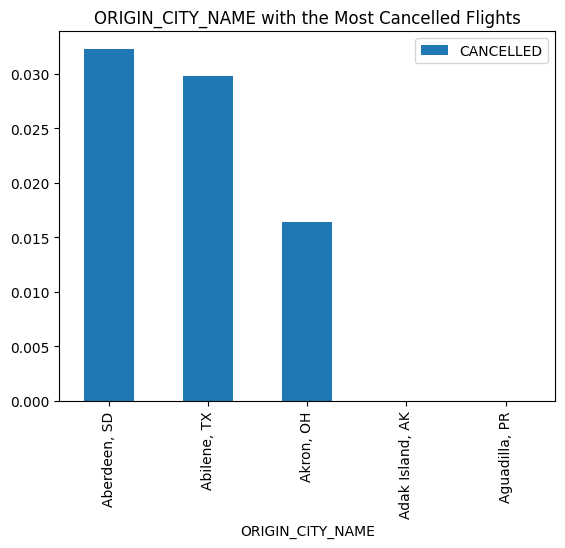

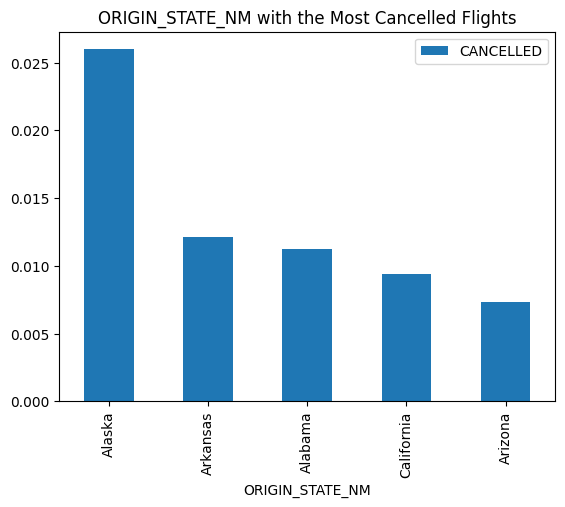

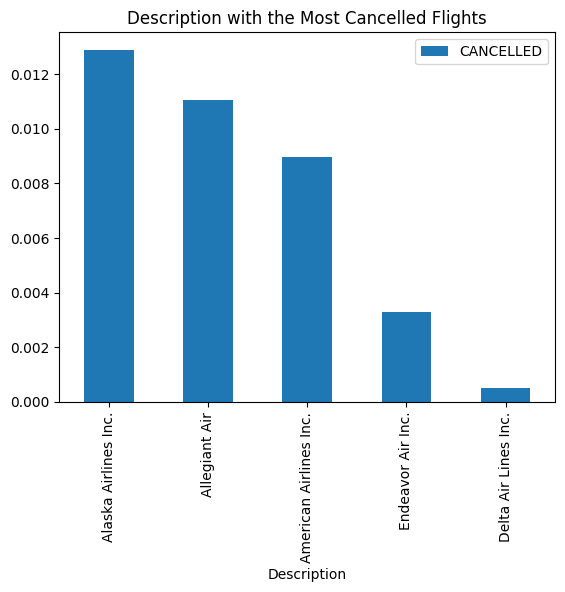

In [72]:
for feature in ['ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_NM','Description']:
    flights.groupby(feature).agg({'CANCELLED':'mean'}).head(5) \
            .rename(index=carrier_dict) \
            .sort_values('CANCELLED', ascending=False).plot.bar()
    plt.title(feature+" with the Most Cancelled Flights")
    plt.show()

#### **RESULTS**
* **Departure Delay** :
    * **PM** flights have a higher proportion of delayed flights than **AM** flights. 
    * **Weekend** flights have a higher proportion of delayed flights than **Weekday** flights. 
    * The day of week with the highest proportion of delayed flights are **Saturday, Friday,** and **Sunday**. 
    * The time of day with the highest proportion of delayed flights are **2AM, 12AM**, and **1AM**.
    * The airports with the highest proportion of delayed flights are **ADK, Aeronaves Del Peru**, and **ABR**. 
    * The cities with the highest proportion of delayed flights are **Adak Island, AK** and  **Aberdeen, SD**.
    * The states with the highest proportion of delayed flights are **Alaska, Florida,** and **Colorado**.
    * The carriers with the highest proportion of delayed flights are **Alaska Airlines, Allegiant Air**, and **Envoy Air**.  
    
  
* **Cancelled** :
    * The day of week with the highest proportion of delayed flights are **Friday, Monday** and **Tuesday**. 
    * The time of day with the highest proportion of delayed flights is **12AM**. 
    * The airports with the highest proportion of cancelled flights are **ABR, Aribama Incorporated** and **ABE**.
    * The cities with the highest proportion of cancelled flights are **Aberdeen, SD** and **Abilene, TX**. 
    * The states with the highest proportion of cancelled flights are **Alaska, Arkansas**, and **Alabama**.
    * The carriers with the highest proportion of cancelled flights are **Alaska Airlines, Allegiant Air**, and **American AirlinesAir**. 


## Multivariate Exploration

### What is the relationship between time of day, time of week, and departure delay?

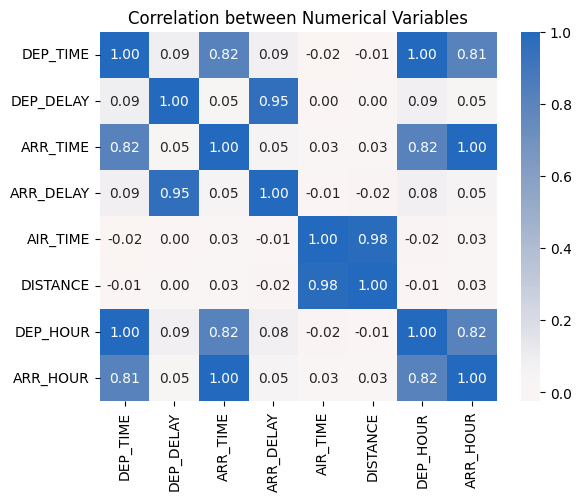

In [73]:
flights2 = flights.drop(['YEAR', 'MONTH'], axis=1)
sns.heatmap(flights2.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);
plt.title('Correlation between Numerical Variables');

Text(0.5, 1.0, 'Arrival Delay by Day of Week and Time')

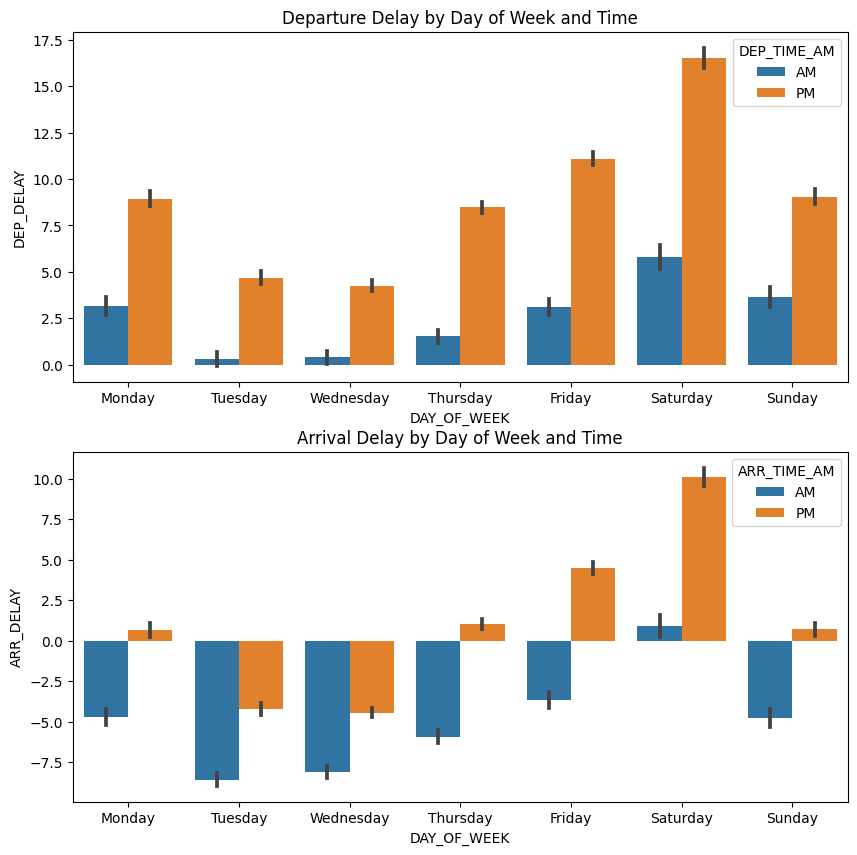

In [89]:
plt.figure(figsize=[10,10])
flights2=flights.dropna(subset=['DAY_OF_WEEK','DEP_DELAY','ARR_DELAY','DEP_TIME_AM'])

plt.subplot(2,1,1)
sns.barplot(data=flights2, x='DAY_OF_WEEK', y='DEP_DELAY', hue='DEP_TIME_AM')
plt.title('Departure Delay by Day of Week and Time')

plt.subplot(2,1,2)
sns.barplot(data=flights2, x='DAY_OF_WEEK', y='ARR_DELAY', hue='ARR_TIME_AM')
plt.title('Arrival Delay by Day of Week and Time')

#### **RESULTS**
* **Departure Delay** : the average departure delay is the longest on Saturday afternoon, and shortest during Tuesday before noon. 
* **Arrival Delay** : the average arrival delay is the longest on Saturday afternoon, and shortest during Tuesday before noon (flights arrive on average 8 minutes before arrival time).